In [1]:
#Import pandas, matplotlib.pyplot, and seaborn 
import pandas as pd
import numpy as np
import math
import missingno as msno
import datetime as dt
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import argrelextrema

In [2]:
data = pd.read_excel('data2017_2020.xlsx')
print(data.shape)
data.head()

(412, 5)


,RATE,month_start,DWEL_UNIT,days_to_count_in_period,usage_to_count_in_period
0,COM,2016-04-01,1,19,1.4
1,COM,2016-05-01,1,12,0.5
2,COM,2016-11-01,3,56,5.7
3,COM,2016-12-01,4,62,6.7
4,COM,2017-01-01,5,69,8.4


In [3]:
data = data.groupby(['RATE', 'month_start'])[['DWEL_UNIT','days_to_count_in_period','usage_to_count_in_period']].\
    sum().reset_index()
print(data.shape)
data.head()

(309, 5)


,RATE,month_start,DWEL_UNIT,days_to_count_in_period,usage_to_count_in_period
0,COM,2016-04-01,2,39,6.1
1,COM,2016-05-01,1,12,0.5
2,COM,2016-11-01,3,56,5.7
3,COM,2016-12-01,4,62,6.7
4,COM,2017-01-01,5,69,8.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   RATE                      309 non-null    object        
 1   month_start               309 non-null    datetime64[ns]
 2   DWEL_UNIT                 309 non-null    int64         
 3   days_to_count_in_period   309 non-null    int64         
 4   usage_to_count_in_period  309 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 12.2+ KB


In [5]:
dwelling = data.groupby('RATE')['DWEL_UNIT'].sum()
dwelling_df = dwelling.to_frame().reset_index()
dwelling_df.columns= ['RATE', 'Number_of_dwellings']
dwelling_df['portion_of_dwellings'] = round(100*dwelling_df['Number_of_dwellings'] /(dwelling_df['Number_of_dwellings'].sum()),3)
dwelling_df

,RATE,Number_of_dwellings,portion_of_dwellings
0,COM,373870,3.192
1,COM&RES,100292,0.856
2,IND,13796,0.118
3,IRR,80148,0.684
4,RDUPLX,1033188,8.822
5,RMF,6288650,53.694
6,RSFD,3822134,32.634


In [6]:
other = round(100* dwelling_df.loc[dwelling_df.portion_of_dwellings <= 0.12 ,'portion_of_dwellings'].sum(),3)

other

11.8

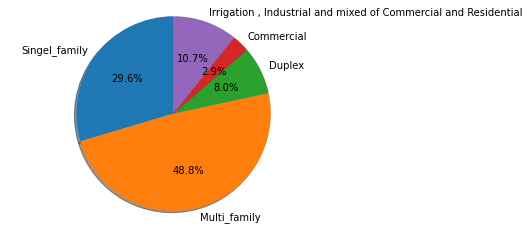

In [7]:
# Pie chart
import matplotlib.pyplot as plotter

mylabels = ['Singel_family', 'Multi_family', 'Duplex', 'Commercial',
          'Irrigation , Industrial and mixed of Commercial and Residential']
mrk_share =[32.6, 53.7, 8.8, 3.2, 11.8]

fig1, ax1 = plt.subplots()
ax1.pie(mrk_share, labels=mylabels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [8]:
data['year']= data.month_start.dt.year

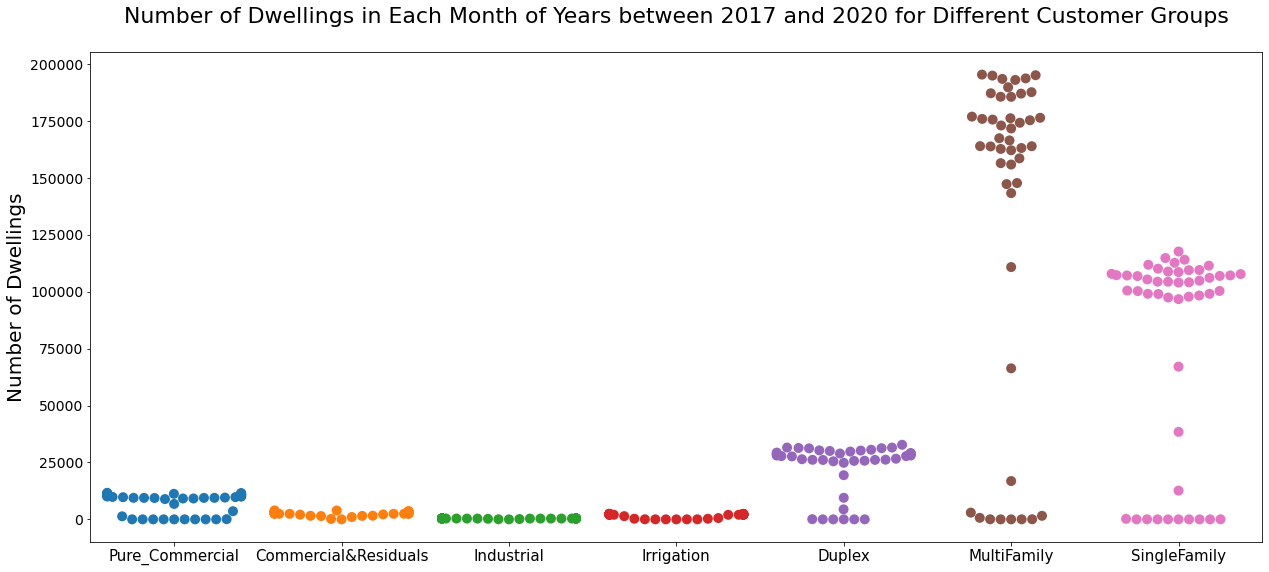

In [9]:
#Plot the range of number of dwellings in different customer groups
plt.figure(figsize=(21,9))

sns.swarmplot(x= data.RATE, y= data.DWEL_UNIT, size= 10)
plt.xticks(ticks=list(range(7)), labels=['Pure_Commercial', 'Commercial&Residuals', 'Industrial', 'Irrigation' ,\
                                         'Duplex', 'MultiFamily', 'SingleFamily'], fontsize=15)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Dwellings', fontsize=20)
plt.title('Number of Dwellings in Each Month of Years between 2017 and 2020 for Different Customer Groups\n',\
          fontsize=22)
plt.show()

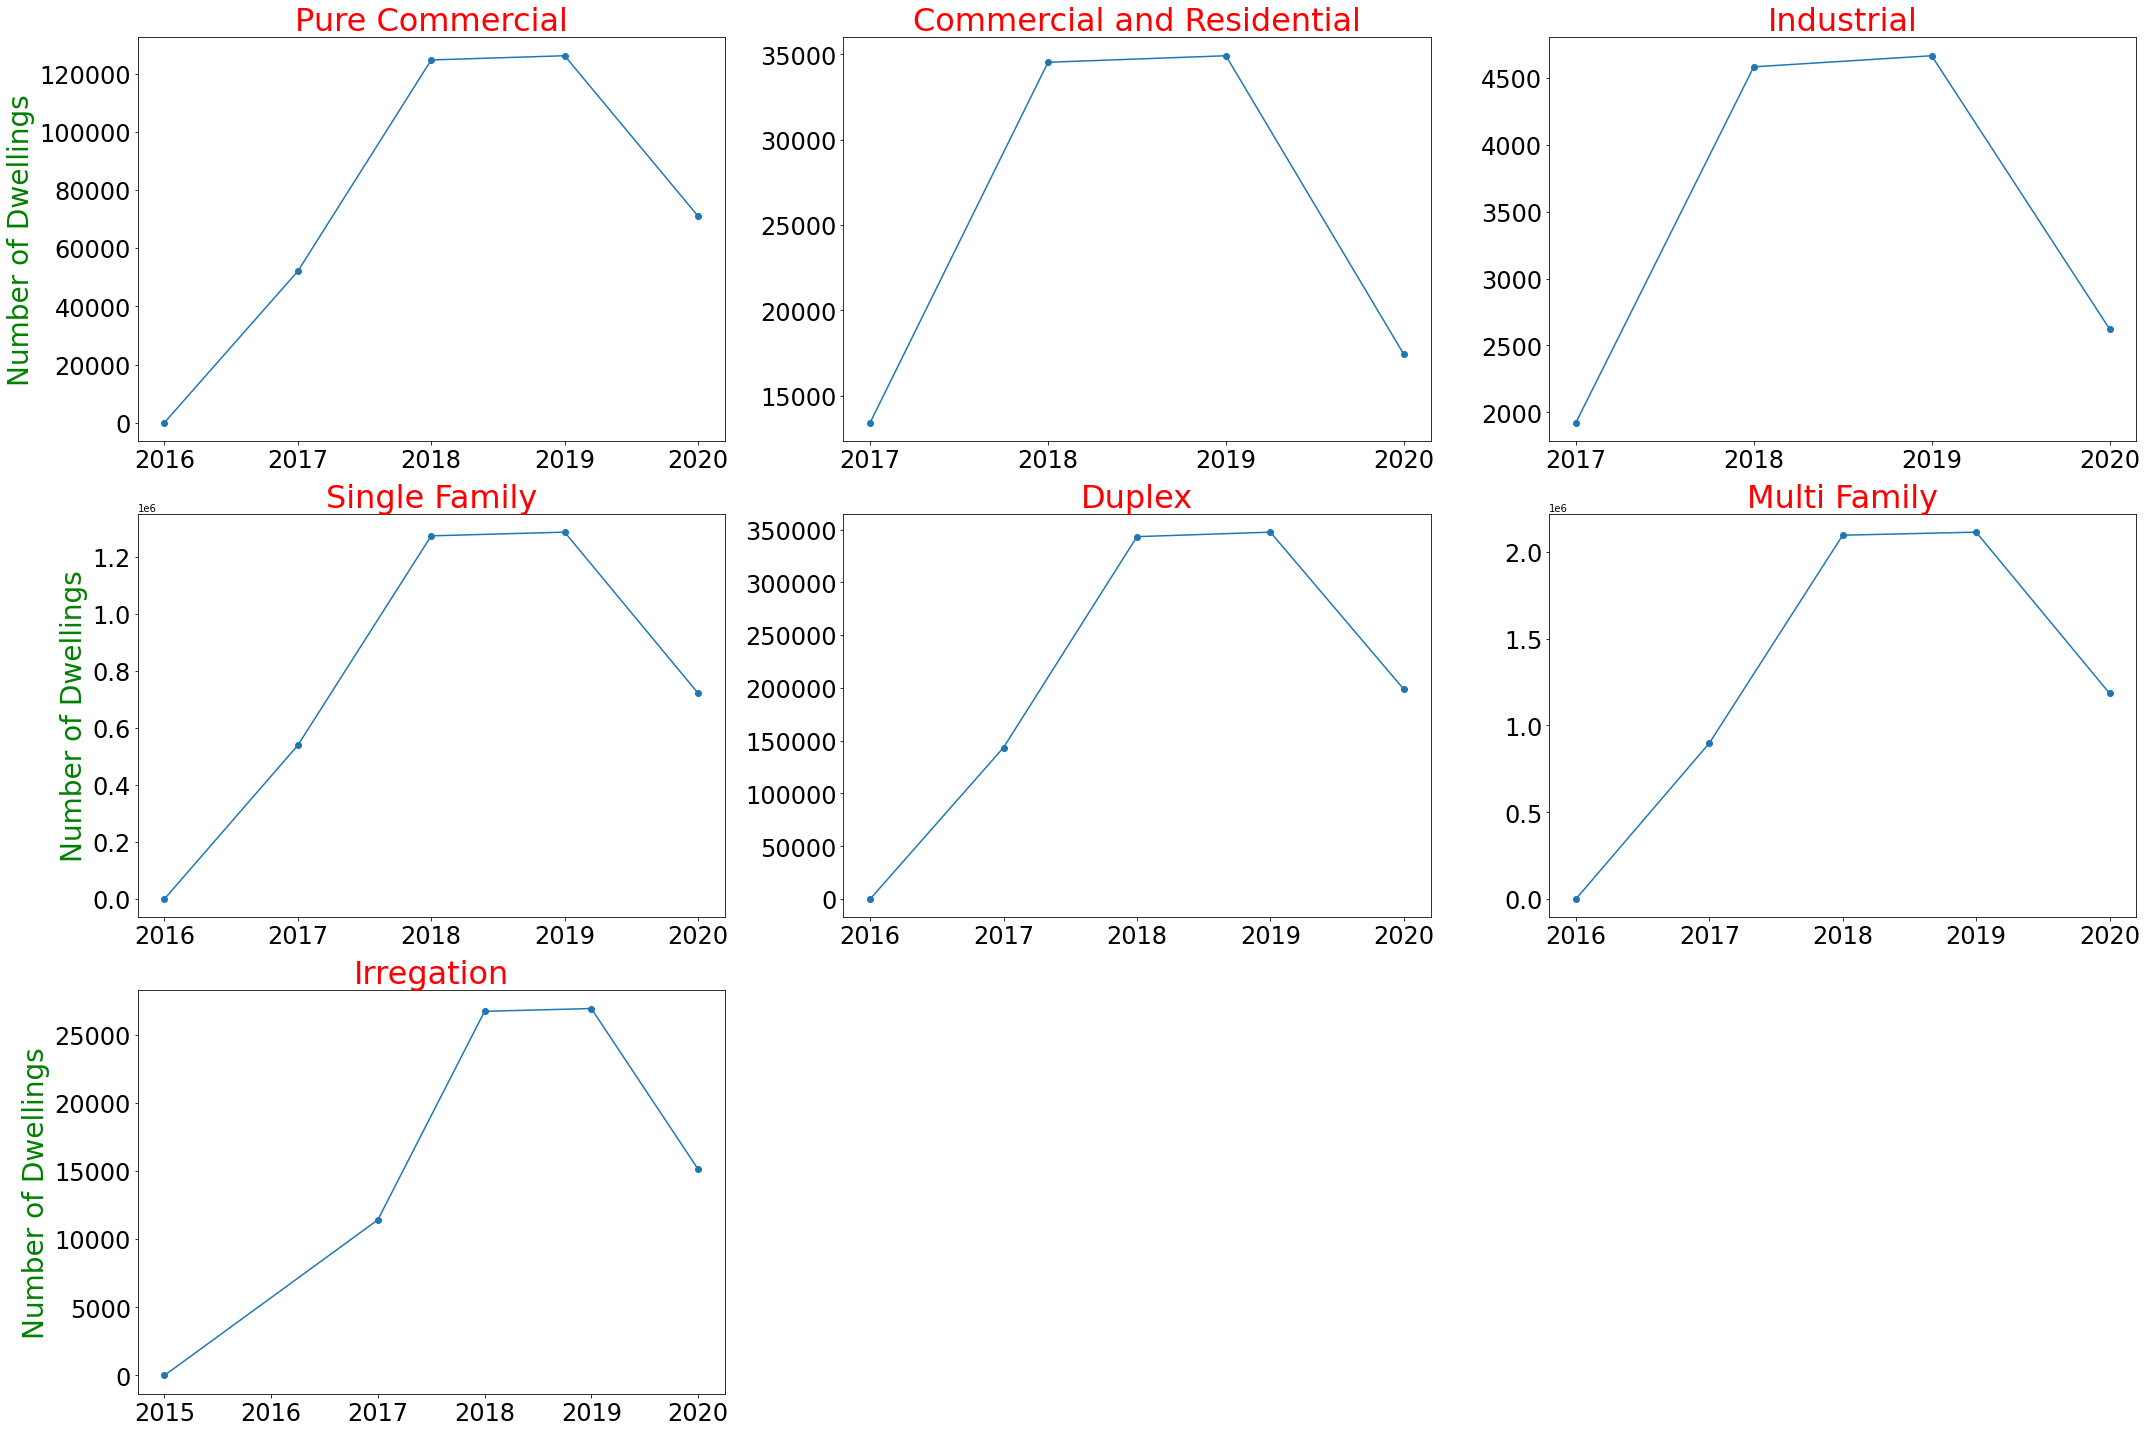

In [10]:
#Plot total number of dwellings in different customer groups
temp = data.groupby([data.RATE,data.year])['DWEL_UNIT'].sum().to_frame()
temp.reset_index(inplace=True)


plt.figure(figsize=(30,20))



ax1 = plt.subplot2grid((3,3), (0, 0))
ax2 = plt.subplot2grid((3,3), (0, 1))
ax3 = plt.subplot2grid((3,3), (0, 2))
ax4 = plt.subplot2grid((3,3), (1, 0))
ax5 = plt.subplot2grid((3,3), (1, 1))
ax6 = plt.subplot2grid((3,3), (1, 2))
ax7 = plt.subplot2grid((3,3), (2, 0))

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

com = temp[temp['RATE'] == 'COM']
ax1.plot(com.year, com.DWEL_UNIT, marker='o')
ax1.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax1.set_ylabel('Number of Dwellings',fontsize=28, c= 'green')
ax1.set_title('Pure Commercial',fontsize=32, c= 'red')

com_and_res = temp[temp['RATE'] == 'COM&RES']
ax2.plot(com_and_res.year, com_and_res.DWEL_UNIT, marker='o')
ax2.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax2.set_title('Commercial and Residential',fontsize=32, c= 'red')
ax2.set_xticks(com_and_res.year)

industrial = temp[temp['RATE'] == 'IND']
ax3.plot(industrial.year, industrial.DWEL_UNIT, marker='o')
ax3.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax3.set_title('Industrial',fontsize=32, c= 'red')
ax3.set_xticks(industrial.year)

singlef = temp[temp['RATE'] == 'RSFD']
ax4.plot(singlef.year, singlef.DWEL_UNIT, marker='o')
ax4.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax4.set_ylabel('Number of Dwellings',fontsize=28, c= 'green')
ax4.set_title('Single Family',fontsize=32, c= 'red')

duplex = temp[temp['RATE'] == 'RDUPLX']
ax5.plot(duplex.year, duplex.DWEL_UNIT, marker='o')
ax5.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax5.set_title('Duplex',fontsize=32, c= 'red')

multif = temp[temp['RATE'] == 'RMF']
ax6.plot(multif.year, multif.DWEL_UNIT, marker='o')
ax6.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax6.set_title('Multi Family',fontsize=32, c= 'red')


irr = temp[temp['RATE'] == 'IRR']
ax7.plot(irr.year, irr.DWEL_UNIT, marker='o')
ax7.set_ylabel('Number of Dwellings',fontsize=28, c= 'green')
ax7.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax7.set_title('Irregation',fontsize=32, c= 'red')


plt.tight_layout()

plt.show()

**There are only a few recording related to water usage in 2015 and 2016, let's drop them.**

In [11]:
#Filter water usage for 2017 and onwards.
data = data[data.year >= 2017 ]
data.head()

,RATE,month_start,DWEL_UNIT,days_to_count_in_period,usage_to_count_in_period,year
4,COM,2017-01-01,5,69,8.4,2017
5,COM,2017-02-01,9,146,14.2,2017
6,COM,2017-03-01,8,124,18.0,2017
7,COM,2017-04-01,8,119,107.9,2017
8,COM,2017-05-01,17,271,465.0,2017


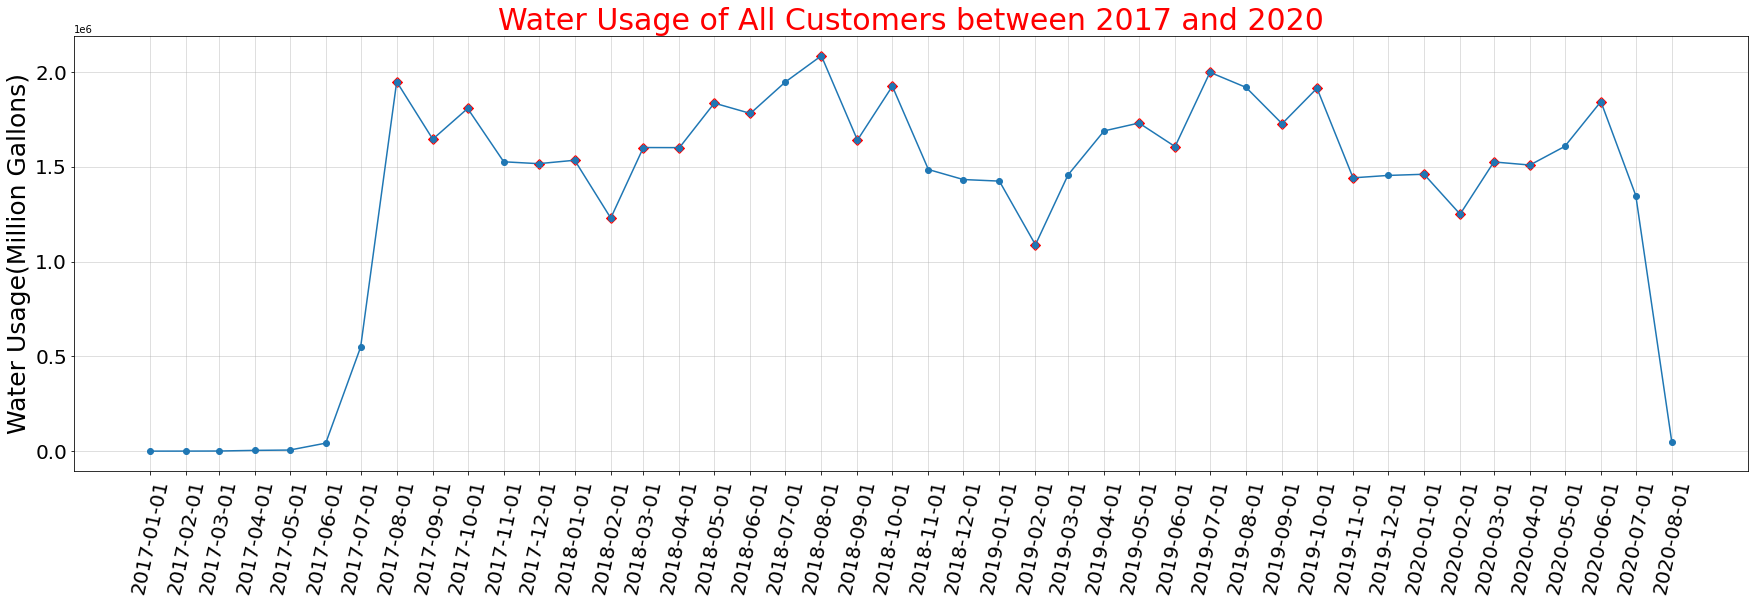

In [12]:
#Plot the water consumpotion from 2017 to 2020 for all customers
plt.figure(figsize=(30,8))
temp = data.groupby('month_start')['usage_to_count_in_period'].sum().reset_index()
plt.plot(temp.month_start, temp.usage_to_count_in_period, marker='o')


Y=np.array(temp.usage_to_count_in_period)
maxInd = argrelextrema(Y, np.greater)
minInd = argrelextrema(Y, np.less)

X=np.array(temp.month_start)
max_loc = X[maxInd]
min_loc = X[minInd]

plt.scatter(x= max_loc, y= Y[maxInd], c='red', s=50, marker='D')
plt.scatter(x= min_loc, y= Y[minInd], c='red', s=50, marker='D')

#Add corresponding grid
plt.grid(which='both')

#Set different settings for the grids
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)
plt.xticks(temp.month_start, fontsize=20, rotation=78)
plt.ylabel('Water Usage(Million Gallons)',fontsize= 25)
plt.yticks(fontsize=20)
plt.title('Water Usage of All Customers between 2017 and 2020', fontsize=30, c='red')
plt.show()


**Water usage in Feb 2018,2019,2020 were the minimum. The reason might be related to number of days in Feb (Feb 2017,2018,2019 had 28 days and Feb2020 had 29 days).**

**June, July and Augest show the relatively high usage in years of 2017,2018 and 2019, the increase in water consumption is due to summer season so there is a seasonality. But increase in usage started from April and continue until June.**

**Besides seasonality, there is a trend.**

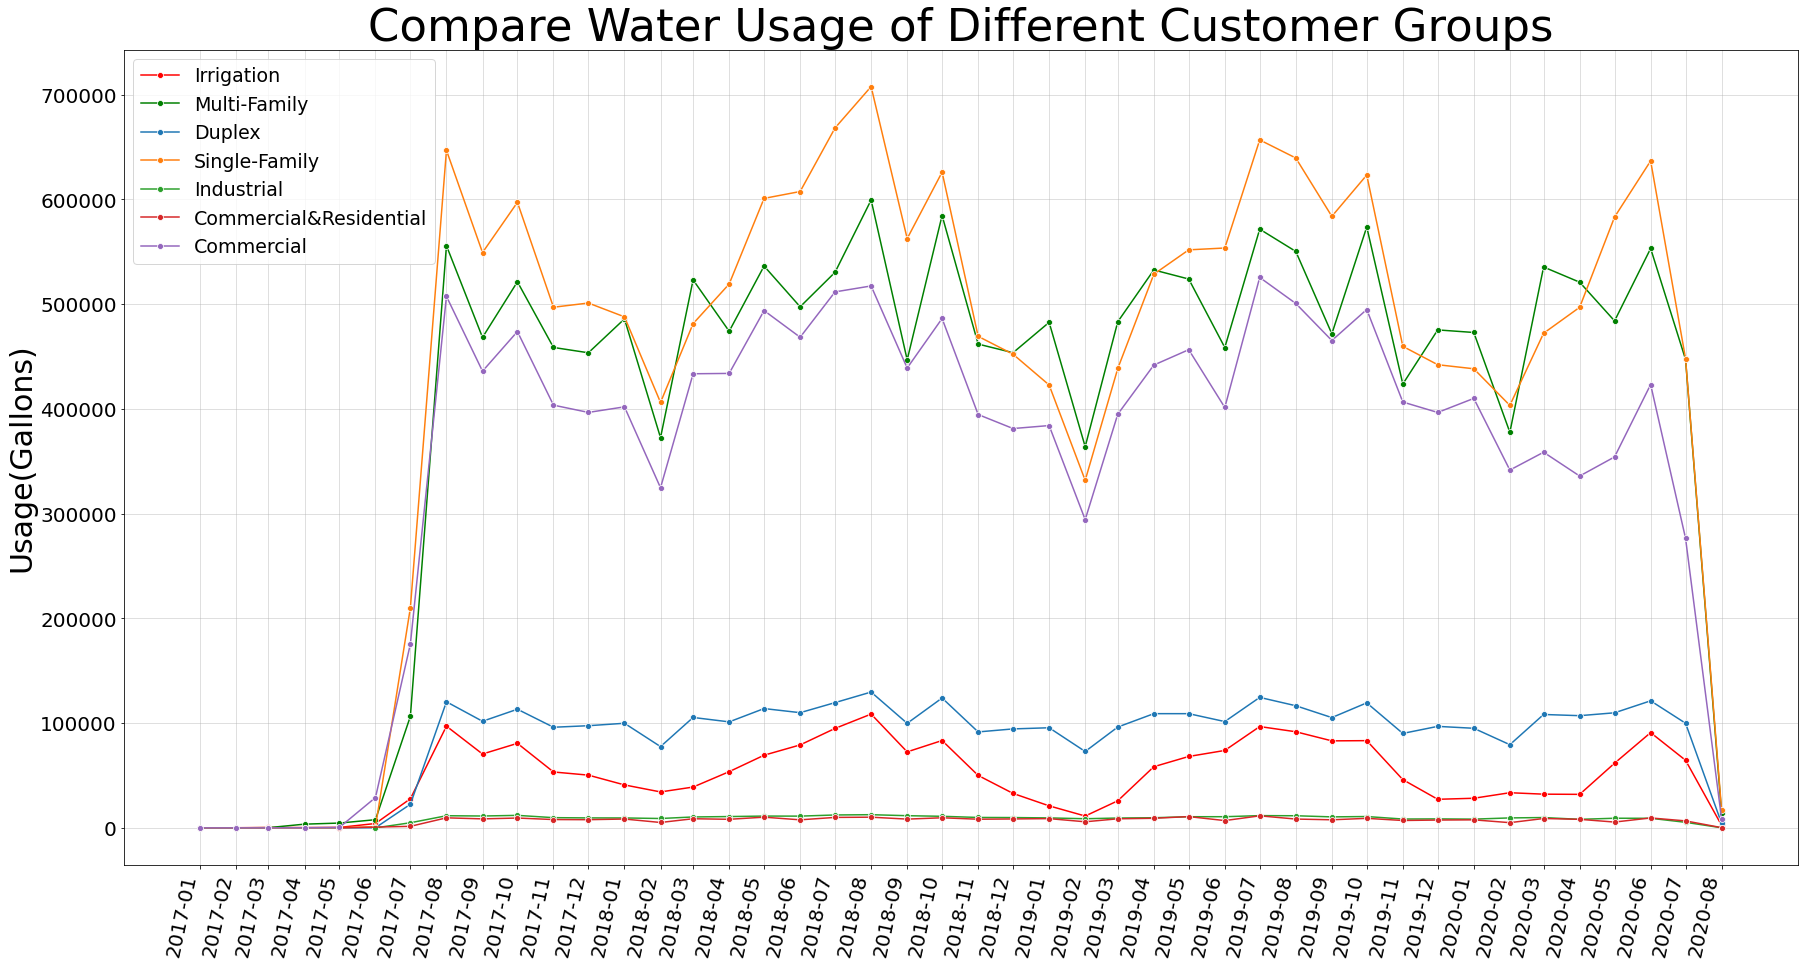

In [15]:
#plot Water Usage of Different Customer Groups
plt.figure(figsize=(30,15))
irr = data[data['RATE'] == 'IRR']
com = data[data['RATE'] == 'COM']
com_and_res = data[data['RATE'] == 'COM&RES']
industrial = data[data['RATE'] == 'IND']
singlef = data[data['RATE'] == 'RSFD']
duplex = data[data['RATE'] == 'RDUPLX']
multif = data[data['RATE'] == 'RMF']

ax = sns.lineplot(irr.month_start, irr.usage_to_count_in_period, marker="o", label='Irrigation', color='red')
sns.lineplot(multif.month_start, multif.usage_to_count_in_period, marker="o", label='Multi-Family', color='green')
sns.lineplot(duplex.month_start, duplex.usage_to_count_in_period, marker='o', label='Duplex')
sns.lineplot(singlef.month_start, singlef.usage_to_count_in_period, marker='o', label= 'Single-Family')
sns.lineplot(industrial.month_start, industrial.usage_to_count_in_period, marker='o', label='Industrial')
sns.lineplot(com_and_res.month_start, com_and_res.usage_to_count_in_period, marker='o', label='Commercial&Residential')
sns.lineplot(com.month_start, com.usage_to_count_in_period, marker='o',label='Commercial')

ax.set(xticks= irr.month_start)
ax.set_xticklabels(irr.month_start.dt.strftime('%Y-%m'), rotation=78, horizontalalignment='right')
ax.set_xlabel('')
ax.set_ylabel('Usage(Gallons)',fontsize = 30)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)

ax.legend(prop=dict(size=19))
ax.set_title('Compare Water Usage of Different Customer Groups',fontsize = 45)



#Add corresponding grid
plt.grid(which='both')

#Set different settings for the grids
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)

plt.show()

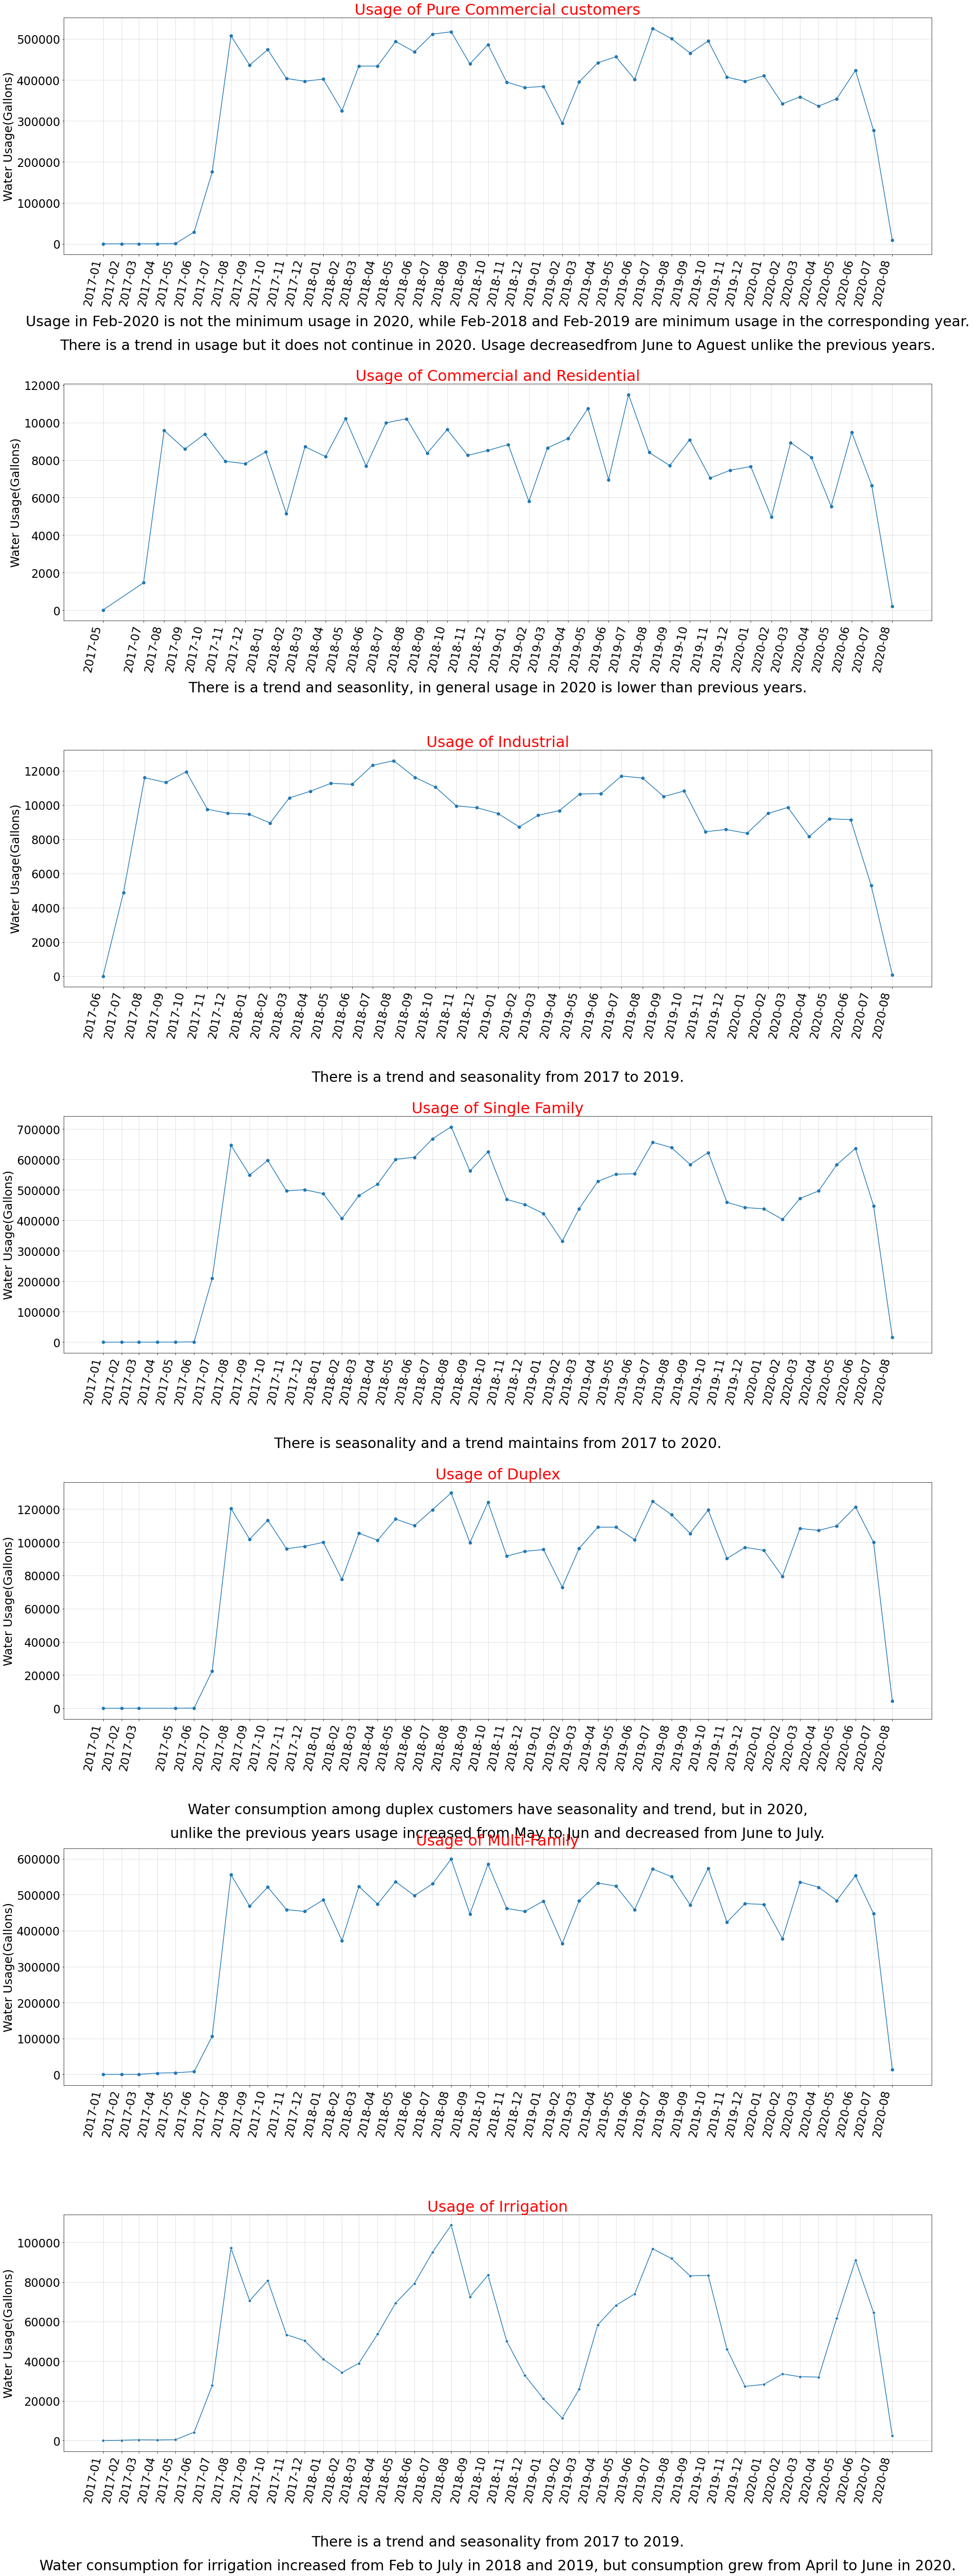

In [16]:
plt.figure(figsize=(30,75))

ax1 = plt.subplot2grid((7,1), (0, 0))
ax2 = plt.subplot2grid((7,1), (1, 0))
ax3 = plt.subplot2grid((7,1), (2, 0))
ax4 = plt.subplot2grid((7,1), (3, 0))
ax5 = plt.subplot2grid((7,1), (4, 0))
ax6 = plt.subplot2grid((7,1), (5, 0))
ax7 = plt.subplot2grid((7,1), (6, 0))


from scipy.signal import argrelextrema

plt.gcf().subplots_adjust(bottom=0.2)

#Pure commercial customers
com = data[data['RATE'] == 'COM']
ax1.plot(com.month_start, com.usage_to_count_in_period, marker='o', label='Pure Commercial')
ax1.set(xticks= com.month_start)
ax1.set_xticklabels(com.month_start.dt.strftime('%Y-%m'), rotation=78, horizontalalignment='right')
ax1.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax1.set_ylabel('Water Usage(Gallons)', fontsize=25)
ax1.set_title('Usage of Pure Commercial customers',fontsize=32, c= 'red')
#Add corresponding grid
ax1.grid(which='both')
#Set different settings for the grids
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.5)

ax1.text(0.5,-.3,\
    'Usage in Feb-2020 is not the minimum usage in 2020, while Feb-2018 and Feb-2019 are minimum usage in the corresponding year.',\
         size=30, ha="center", 
         transform=ax1.transAxes)
ax1.text(0.5,-.4,\
    'There is a trend in usage but it does not continue in 2020. Usage decreasedfrom June to Aguest unlike the previous years.',\
         size=30, ha="center", 
         transform=ax1.transAxes)






#Mixed commercial and residential customers
com_and_res = data[data['RATE'] == 'COM&RES']
ax2.plot(com_and_res.month_start, com_and_res.usage_to_count_in_period, marker='o')
ax2.set(xticks= com_and_res.month_start)
ax2.set_xticklabels(com_and_res.month_start.dt.strftime('%Y-%m'), rotation=78, horizontalalignment='right')
ax2.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax2.set_ylabel('Water Usage(Gallons)', fontsize=25)
ax2.set_title('Usage of Commercial and Residential',fontsize=32, c= 'red')
#Add corresponding grid
ax2.grid(which='both')
#Set different settings for the grids
ax2.grid(which='minor', alpha=0.2)
ax2.grid(which='major', alpha=0.5)


ax2.text(0.5,-.3,\
    'There is a trend and seasonlity, in general usage in 2020 is lower than previous years.',\
         size=30, ha="center", 
         transform=ax2.transAxes)






industrial = data[data['RATE'] == 'IND']
ax3.plot(industrial.month_start, industrial.usage_to_count_in_period, marker='o')
ax3.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax3.set(xticks= industrial.month_start)
ax3.set_xticklabels(industrial.month_start.dt.strftime('%Y-%m'), rotation=78, horizontalalignment='right')
ax3.set_ylabel('Water Usage(Gallons)', fontsize=25)
ax3.set_title('Usage of Industrial',fontsize=32, c= 'red')
#Add corresponding grid
ax3.grid(which='both')
#Set different settings for the grids
ax3.grid(which='minor', alpha=0.2)
ax3.grid(which='major', alpha=0.5)
ax3.text(0.5,-.4,\
    'There is a trend and seasonality from 2017 to 2019.',\
         size=30, ha="center", transform=ax3.transAxes)

#Single family
singlef = data[data['RATE'] == 'RSFD']
ax4.plot(singlef.month_start, singlef.usage_to_count_in_period, marker='o')
ax4.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax4.set(xticks= singlef.month_start)
ax4.set_xticklabels(singlef.month_start.dt.strftime('%Y-%m'), rotation=78, horizontalalignment='right')
ax4.set_ylabel('Water Usage(Gallons)', fontsize=25)
ax4.set_title('Usage of Single Family',fontsize=32, c= 'red')
#Add corresponding grid
ax4.grid(which='both')
#Set different settings for the grids
ax4.grid(which='minor', alpha=0.2)
ax4.grid(which='major', alpha=0.5)


ax4.text(0.5,-.4,'There is seasonality and a trend maintains from 2017 to 2020.',\
         size=30, ha="center", 
         transform=ax4.transAxes)






#Duplex
duplex = data[data['RATE'] == 'RDUPLX']
ax5.plot(duplex.month_start, duplex.usage_to_count_in_period, marker='o')
ax5.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax5.set(xticks= duplex.month_start)
ax5.set_xticklabels(duplex.month_start.dt.strftime('%Y-%m'), rotation=78, horizontalalignment='right')
ax5.set_ylabel('Water Usage(Gallons)', fontsize=25)
ax5.set_title('Usage of Duplex',fontsize=32, c= 'red')
#Add corresponding grid
ax5.grid(which='both')
#Set different settings for the grids
ax5.grid(which='minor', alpha=0.2)
ax5.grid(which='major', alpha=0.5)

ax5.text(0.5,-.4,'Water consumption among duplex customers have seasonality and trend, but in 2020,',\
         size=30, ha="center", 
         transform=ax5.transAxes)
ax5.text(0.5,-.5,'unlike the previous years usage increased from May to Jun and decreased from June to July.',\
         size=30, ha="center", 
         transform=ax5.transAxes)





#Multi family
multif = data[data['RATE'] == 'RMF']
ax6.plot(multif.month_start, multif.usage_to_count_in_period, marker="o")
ax6.set(xticks= multif.month_start)
ax6.set_xticklabels(multif.month_start.dt.strftime('%Y-%m'), rotation=78, horizontalalignment='right')
ax6.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax6.set_xticklabels(multif.month_start.dt.strftime('%Y-%m'), rotation=78, horizontalalignment='right')
ax6.set_ylabel('Water Usage(Gallons)', fontsize=25)
ax6.set_title('Usage of Multi-Family',fontsize=32, c= 'red')
#Add corresponding grid
ax6.grid(which='both')
#Set different settings for the grids
ax6.grid(which='minor', alpha=0.2)
ax6.grid(which='major', alpha=0.5)




#Irrigation
irr = data[data['RATE'] == 'IRR']
ax7 = sns.lineplot(irr.month_start, irr.usage_to_count_in_period, marker="o")
ax7.set(xticks= irr.month_start)
ax7.set_xlabel('')
ax7.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax7.set_xticklabels(irr.month_start.dt.strftime('%Y-%m'), rotation=78, horizontalalignment='right')
ax7.set_ylabel('Water Usage(Gallons)', fontsize=25)
ax7.set_title('Usage of Irrigation',fontsize=32, c= 'red')
#Add corresponding grid
ax7.grid(which='both')
#Set different settings for the grids
ax7.grid(which='minor', alpha=0.2)
ax7.grid(which='major', alpha=0.5)
ax7.text(0.5,-.4,\
    'There is a trend and seasonality from 2017 to 2019.',\
         size=30, ha="center", transform=ax7.transAxes)
ax7.text(0.5,-.5,\
    'Water consumption for irrigation increased from Feb to July in 2018 and 2019, but consumption grew from April to June in 2020.',\
         size=30, ha="center", transform=ax7.transAxes)



plt.tight_layout() 
plt.show()